In [10]:
%matplotlib inline

In [60]:
import sys
sys.path.append("../")

from haxml.prediction import (
    generate_rows_edwin,
    predict_xg_edwin
)
from haxml.utils import (
    get_stadiums,
    get_matches_metadata,
    load_match,
    train_test_split_matches_even_count,
    get_positions_at_time
)

from haxml.viz import (
    plot_positions,
    get_xg_time_series,
    plot_xg_time_series,
    zoom_stadium,
    plot_positions
)

from haxml.evaluation import (
    make_df
)
import pandas as pd
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import joblib

In [22]:
stadiums = get_stadiums("../data/stadiums.json")
metadata = get_matches_metadata("../data/matches_metadata.csv")
clf = joblib.load("../models/random_forest_max_depth_12.pkl")
train, test = train_test_split_matches_even_count(metadata)

In [20]:
d_train = make_df(train, stadiums, generate_rows_edwin, progress=True)
d_test = make_df(test, stadiums, generate_rows_edwin, progress=True)

100%|██████████| 850/850 [02:18<00:00,  6.12it/s]


In [85]:
MATCH = "-MQp2WdIF6ef-qmAyfcR"
STADIUM = "NAFL 1v1/2v2 Map v1"
model_name = "random forest"
s = stadiums[STADIUM]
match = load_match(
    "../data/packed_matches/{}.json".format(MATCH),
    lambda m: predict_xg_edwin(m, s, generate_rows_edwin, clf)
)

FileNotFoundError: [Errno 2] No such file or directory: '../data/packed_matches/-MQp2WdIF6ef-qmAyfcR.json'

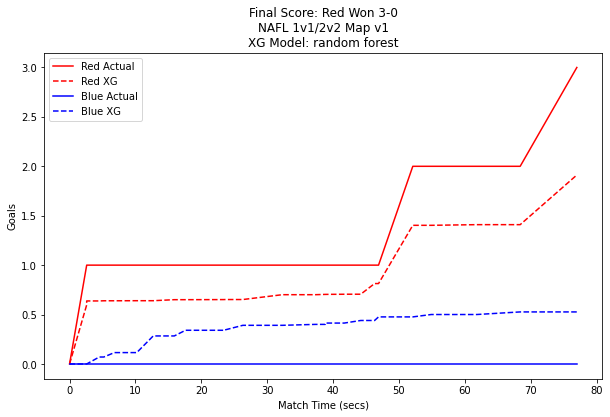

In [83]:
fig, ax = plot_xg_time_series(match)
ax.set_title("{}\nXG Model: {}".format(ax.title.get_text(), model_name))
fig.set_size_inches(10, 6)
fig

In [63]:
pd.DataFrame(match["kicks"]).query("type == 'goal'")

,time,type,fromId,fromX,fromY,fromName,fromTeam,toId,toX,toY,toName,toTeam,xg
4,15.3,goal,19,-51.0,-95.0,Player 22,blue,NaN,NaN,NaN,None,None,0.703840
11,52.6,goal,19,211.0,133.0,Player 22,blue,NaN,NaN,NaN,None,None,0.097996
25,76.4,goal,4,335.0,12.0,Player 18,red,NaN,NaN,NaN,None,None,0.472710
30,94.0,goal,4,-236.0,-107.0,Player 18,red,NaN,NaN,NaN,None,None,0.153921


In [64]:
max(pd.DataFrame(match["kicks"])['xg'])

0.7038401878148658

In [73]:
kick = list(filter(lambda k: k["type"] == "goal",match["kicks"]))[0]
kick

{'time': 15.3,
 'type': 'goal',
 'fromId': 19,
 'fromX': -51.0,
 'fromY': -95.0,
 'fromName': 'Player 22',
 'fromTeam': 'blue',
 'toId': None,
 'toX': None,
 'toY': None,
 'toName': None,
 'toTeam': None,
 'xg': 0.7038401878148658}

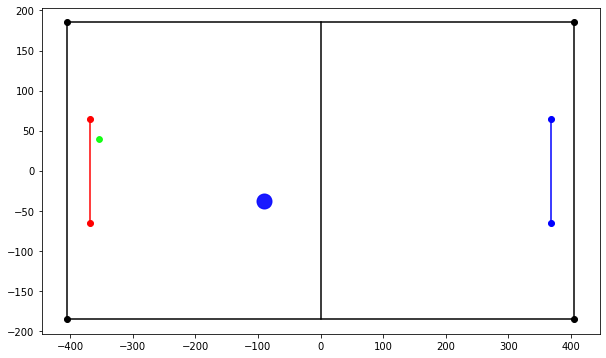

In [76]:
positions = get_positions_at_time(match["positions"], kick["time"])
fig,ax = plot_positions(positions,s)
fig.set_size_inches(10,6)
fig

In [77]:
metadata[45]

{'match_id': '-MPGtURjaUui1pTiI8nW',
 'stadium': 'NAFL 1v1/2v2 Map v1',
 'time': 94.0,
 'kicks_red': 17,
 'kicks_blue': 14,
 'score_red': 3,
 'score_blue': 2,
 'scored_goals_red': 2,
 'scored_goals_blue': 2}